In [222]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [223]:
plant_data = pd.read_excel("/Users/sahityaraipura/Desktop/Folds5x2_pp.xlsx")
plant_data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [224]:
plant_data.shape

(9568, 5)

In [225]:
list(plant_data.columns.values)

['AT', 'V', 'AP', 'RH', 'PE']

In [226]:
plant_data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


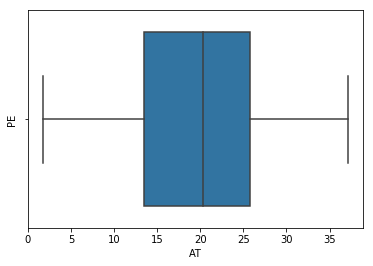

In [227]:
sns.scatterplot(x=plant_data['AT'], y=plant_data['PE'])
sns.boxplot(x=plant_data['AT'])

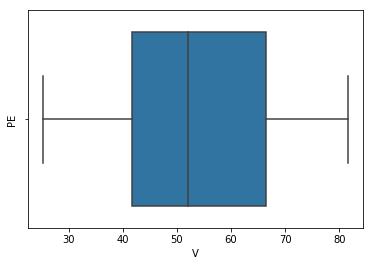

In [228]:
sns.scatterplot(x=plant_data['V'], y=plant_data['PE'])
sns.boxplot(x=plant_data['V'])

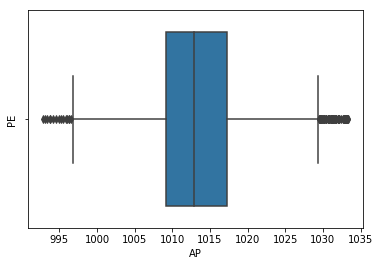

In [229]:
sns.scatterplot(x=plant_data['AP'], y=plant_data['PE'])
sns.boxplot(x=plant_data['AP'])

1013.2590781772603


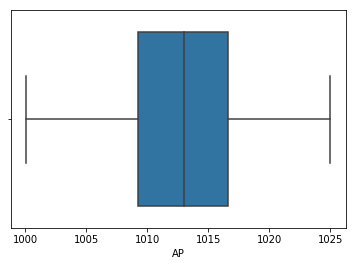

In [230]:
mean_AP = plant_data['AP'].mean(skipna=True)
print(mean_AP)

plant_data['AP'] = plant_data.AP.mask(plant_data.AP <= 1000, mean_AP)
plant_data['AP'] = plant_data.AP.mask(plant_data.AP >= 1025, mean_AP)

sns.boxplot(x=plant_data['AP'])

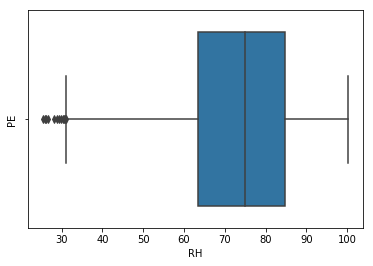

In [231]:
sns.scatterplot(x=plant_data['RH'], y=plant_data['PE'])
sns.boxplot(x=plant_data['RH'])

In [232]:
mean_RH = plant_data['RH'].mean(skipna=True)
print(mean_RH)

#plant_data['RH'] = plant_data.RH.mask(plant_data.RH <= 50, mean_RH)

#sns.boxplot(x=plant_data['RH'])
    

73.30897784280926


In [233]:
from sklearn.model_selection import train_test_split
x = plant_data.iloc[:, 0:4].values
y = plant_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [234]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [235]:
print(linreg.intercept_)

425.30022290043183


In [236]:
print(linreg.coef_)

[-1.96673573 -0.23741777  0.09094317 -0.15703778]


In [237]:
print(y_test)

[431.23 460.01 461.14 ... 473.26 438.   463.28]


In [238]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.5531481141637635

In [239]:
y_pred = linreg.predict(X_test)
print(y_pred)

[431.39284415 458.82056794 462.95378535 ... 469.81242484 442.22628984
 461.74859011]


In [240]:
linreg.score(X_test,y_test)*100

93.28312016234406

In [241]:
from sklearn.externals import joblib
from flask import Flask
filename = 'PowerPlantWeb.sav'
joblib.dump(linreg, open(filename, 'wb'))